In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [69]:
df =pd.read_csv('C:/Users/Hoi Yee/Downloads/loan.csv')
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95,360.0,1.0,Urban,Y


### 1: Data Preparation

In [70]:
df.shape 


(381, 13)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    int64  
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(3), int64(2), object(8)
memory usage: 38.8+ KB


In [72]:
#handling missing value
df.isnull().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [73]:
df.isnull().mean()*100

Loan_ID              0.000000
Gender               1.312336
Married              0.000000
Dependents           2.099738
Education            0.000000
Self_Employed        5.511811
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.000000
Loan_Amount_Term     2.887139
Credit_History       7.874016
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [75]:
df =df.dropna(subset = ['Loan_ID', 'Gender', 'Dependents', 'Loan_Amount_Term'])


In [76]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95,360.0,1.0,Urban,Y


In [77]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        20
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [78]:
df.shape

(358, 13)

In [79]:
df['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [80]:
df['Self_Employed'].mode()[0]

'No'

In [81]:
df['Credit_History'].unique()

array([ 1., nan,  0.])

In [82]:
df['Credit_History'].mode()

0    1.0
Name: Credit_History, dtype: float64

In [83]:
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)

C:\Users\Hoi Yee\AppData\Local\Temp\ipykernel_2040\3551408541.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
C:\Users\Hoi Yee\AppData\Local\Temp\ipykernel_2040\3551408541.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

In [84]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 358 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            358 non-null    object 
 1   Gender             358 non-null    object 
 2   Married            358 non-null    object 
 3   Dependents         358 non-null    object 
 4   Education          358 non-null    object 
 5   Self_Employed      358 non-null    object 
 6   ApplicantIncome    358 non-null    int64  
 7   CoapplicantIncome  358 non-null    float64
 8   LoanAmount         358 non-null    int64  
 9   Loan_Amount_Term   358 non-null    float64
 10  Credit_History     358 non-null    float64
 11  Property_Area      358 non-null    object 
 12  Loan_Status        358 non-null    object 
dtypes: float64(3), int64(2), object(8)
memory usage: 39.2+ KB


In [86]:
df['Dependents'].unique()

array(['1', '0', '2', '3+'], dtype=object)

In [87]:
df['Dependents'].replace('3+', '4', inplace=True)

C:\Users\Hoi Yee\AppData\Local\Temp\ipykernel_2040\2245831984.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Dependents'].replace('3+', '4', inplace=True)


In [88]:
df['Dependents'].unique()

array(['1', '0', '2', '4'], dtype=object)

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 358 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            358 non-null    object 
 1   Gender             358 non-null    object 
 2   Married            358 non-null    object 
 3   Dependents         358 non-null    object 
 4   Education          358 non-null    object 
 5   Self_Employed      358 non-null    object 
 6   ApplicantIncome    358 non-null    int64  
 7   CoapplicantIncome  358 non-null    float64
 8   LoanAmount         358 non-null    int64  
 9   Loan_Amount_Term   358 non-null    float64
 10  Credit_History     358 non-null    float64
 11  Property_Area      358 non-null    object 
 12  Loan_Status        358 non-null    object 
dtypes: float64(3), int64(2), object(8)
memory usage: 39.2+ KB


In [90]:
encoding= {
    'Gender' :{'Male':1, 'Female':0},
    'Married' :{'Yes':1, 'No':0},
    'Dependents' :{'0':0, '1':1, '2':2, '4':4},
    'Education' :{'Graduate':1, 'Not Graduate':0},
    'Self_Employed':{'Yes':1, 'No':0},
    'Property_Area' :{'Rural':0, 'Semiurban':2, 'Urban':1},
    'Loan_Status':{'Y':1, 'N':0}
}

In [91]:
df.replace(encoding, inplace=True)

C:\Users\Hoi Yee\AppData\Local\Temp\ipykernel_2040\3659977363.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(encoding, inplace=True)


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 358 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            358 non-null    object 
 1   Gender             358 non-null    int64  
 2   Married            358 non-null    int64  
 3   Dependents         358 non-null    int64  
 4   Education          358 non-null    int64  
 5   Self_Employed      358 non-null    int64  
 6   ApplicantIncome    358 non-null    int64  
 7   CoapplicantIncome  358 non-null    float64
 8   LoanAmount         358 non-null    int64  
 9   Loan_Amount_Term   358 non-null    float64
 10  Credit_History     358 non-null    float64
 11  Property_Area      358 non-null    int64  
 12  Loan_Status        358 non-null    int64  
dtypes: float64(3), int64(9), object(1)
memory usage: 39.2+ KB


In [93]:
X = df.drop('Loan_Status', axis=1)
y= df['Loan_Status']

In [94]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,1,1,1,1,0,4583,1508.0,128,360.0,1.0,0,0
1,LP001005,1,1,0,1,1,3000,0.0,66,360.0,1.0,1,1
2,LP001006,1,1,0,0,0,2583,2358.0,120,360.0,1.0,1,1
3,LP001008,1,0,0,1,0,6000,0.0,141,360.0,1.0,1,1
4,LP001013,1,1,0,0,0,2333,1516.0,95,360.0,1.0,1,1


In [107]:
df =df.drop('Loan_ID', axis= 1)

In [108]:
df =df.dropna(subset = ['Gender', 'Dependents', 'Loan_Amount_Term'])

In [117]:
df.shape

(358, 12)

In [118]:
df['Self_Employed'].mode()[0]

0

In [119]:
df['Credit_History'].mode()

0    1.0
Name: Credit_History, dtype: float64

In [120]:
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)

C:\Users\Hoi Yee\AppData\Local\Temp\ipykernel_2040\3186598182.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)


In [121]:
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)

C:\Users\Hoi Yee\AppData\Local\Temp\ipykernel_2040\2963584314.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)


In [122]:
df['Dependents'].unique()

array([1, 0, 2, 4], dtype=int64)

In [123]:
encoding= {
    'Gender' :{'Male':1, 'Female':0},
    'Married' :{'Yes':1, 'No':0},
    'Dependents' :{'0':0, '1':1, '2':2, '4':4},
    'Education' :{'Graduate':1, 'Not Graduate':0},
    'Self_Employed':{'Yes':1, 'No':0},
    'Property_Area' :{'Rural':0, 'Semiurban':2, 'Urban':1},
    'Loan_Status':{'Y':1, 'N':0}
}

In [ ]:
df.replace(encoding, inplace=True)

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 358 entries, 0 to 380
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             358 non-null    int64  
 1   Married            358 non-null    int64  
 2   Dependents         358 non-null    int64  
 3   Education          358 non-null    int64  
 4   Self_Employed      358 non-null    int64  
 5   ApplicantIncome    358 non-null    int64  
 6   CoapplicantIncome  358 non-null    float64
 7   LoanAmount         358 non-null    int64  
 8   Loan_Amount_Term   358 non-null    float64
 9   Credit_History     358 non-null    float64
 10  Property_Area      358 non-null    int64  
 11  Loan_Status        358 non-null    int64  
dtypes: float64(3), int64(9)
memory usage: 36.4 KB


In [125]:
X = df.drop('Loan_Status', axis=1)
y= df['Loan_Status']

In [126]:
num_cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']

In [127]:
scaler= StandardScaler()

X[num_cols] = scaler.fit_transform(X[num_cols])

In [128]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,1,1,0,0.711630,0.092069,0.805980,0.285826,1.0,0
1,1,1,0,1,1,-0.398856,-0.539332,-1.350425,0.285826,1.0,1
2,1,1,0,0,0,-0.691384,0.447965,0.527735,0.285826,1.0,1
3,1,0,0,1,0,1.705666,-0.539332,1.258130,0.285826,1.0,1
4,1,1,0,0,0,-0.866761,0.095418,-0.341784,0.285826,1.0,1


In [129]:
model=GradientBoostingClassifier()

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [131]:
model.fit(X_train, y_train)

GradientBoostingClassifier()

### 2: Build and Train the Model

In [132]:
y_pred= model.predict(X_test)

In [133]:
accuracy = accuracy_score(y_test, y_pred)

In [135]:
# Evaluate performance
print(f'Accuarcy : {accuracy: .2f}')

Accuarcy :  0.86


In [136]:
cross_val= cross_val_score(model, X, y, cv=5)
avg_cross_val = np.mean(cross_val)
print(f'cross-val-score : {avg_cross_val: .2f}')


cross-val-score :  0.82


In [142]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse: .2f}")

Mean Squared Error:  0.14


In [146]:
#precision, recall, F1-score, and the ROC-AUC score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, classification_report, roc_curve

clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)          # Predicted labels
y_prob = clf.predict_proba(X_test)    # Predicted probabilities

C:\Users\Hoi Yee\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:32:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [148]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Precision: 0.88
Recall: 0.95
F1-Score: 0.91


In [149]:
roc_auc = roc_auc_score(y_test, y_prob[:, 1])  # Use probabilities for the positive class
print(f"ROC-AUC Score: {roc_auc:.2f}")

ROC-AUC Score: 0.80


In [150]:
# Classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.75      0.56      0.64        16
           1       0.88      0.95      0.91        56

    accuracy                           0.86        72
   macro avg       0.82      0.75      0.78        72
weighted avg       0.85      0.86      0.85        72



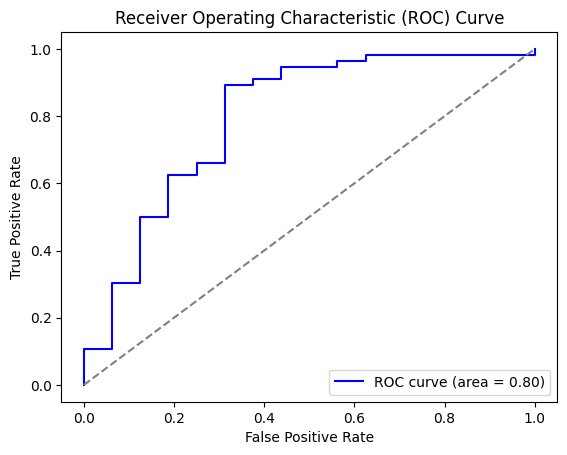

In [151]:
import matplotlib.pyplot as plt

# Calculate the False Positive Rate (FPR) and True Positive Rate (TPR)
fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


### 3: Evaluate and Interpret Results

In [153]:
#calibration_curve: evaluate how well predicted probabilities match actual probabilities

from sklearn.calibration import calibration_curve
y_prob = clf.predict_proba(X_test)[:, 1]
# Compute the calibration curve
prob_true, prob_pred = calibration_curve(y_test, y_prob, n_bins=10, strategy='uniform')


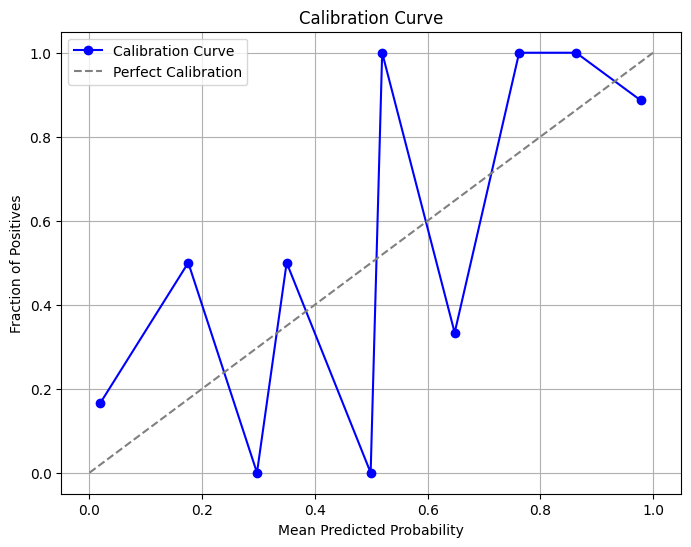

In [154]:
# Plot calibration curve
plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, marker='o', label='Calibration Curve', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfect Calibration', color='gray')  # Reference line
plt.title("Calibration Curve")
plt.xlabel("Mean Predicted Probability")
plt.ylabel("Fraction of Positives")
plt.legend(loc="best")
plt.grid()
plt.show()


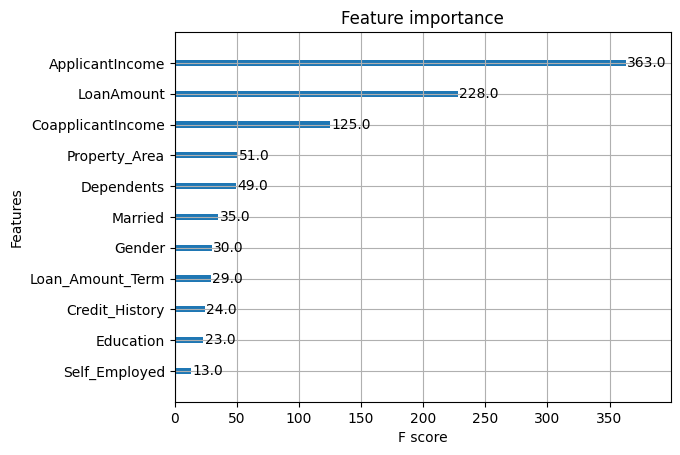

In [155]:
#Feature Importance

from xgboost import plot_importance
plot_importance(clf)
plt.show()

### Insights: 

Summarize your findings based on the model’s performance, highlighting key factors such as which features are most predictive of loan approval and how hyperparameter tuning improved the model’s accuracy.

### Top Features
------------

based on the highest importance score (363.0), the most important features are:
ApplicantIncome, LoanAmount and CoapplicantIncome

### ROC Curve
------------------
Area Under the Curve (AUC) = 0.80 indicates good model performance.
The closer the curve is to the top-left corner, the better the model's performance.
An AUC of 0.80 suggests the model distinguishes well between the positive and negative classes.


### Calibration Curve
------------------
dashed line represents perfect calibration
blue line represents relationship between predicted probabilities (x-axis) and the actual fraction of positives (y-axis) 

At lower probabilities (0.2), the model underpredict (fraction of positives is higher than predicted probability).
At higher probabilities (0.6–1.0), the model shows better alignment with the perfect calibration curve.